<a href="https://colab.research.google.com/github/SergioCuadrado08/PSD_Repository/blob/main/Practica_IFFT_27NNOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRERIAS

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

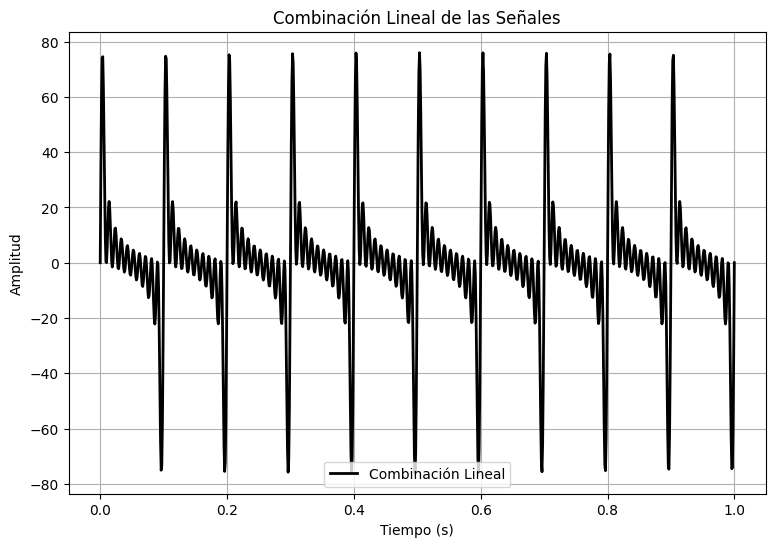

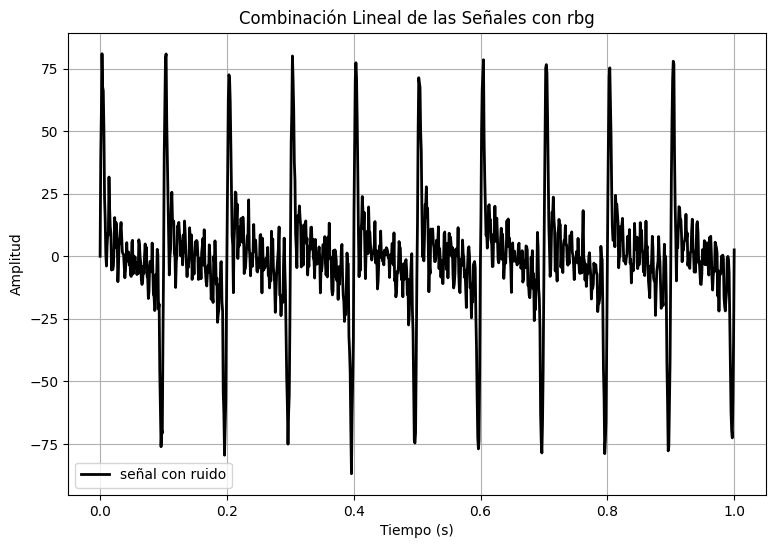

In [3]:
f_0 = 1000
T = 1
t = np.linspace(0, T, int(f_0 * T))

# Generación de las señales sinusoidales
frecuencias = np.linspace(10, 100, 10)  # Frecuencias de 10 a 100 Hz
#amplitudes = np.random.rand(10)         # Amplitudes aleatorias
wn = np.random.normal(0, 5, f_0)

# Combinación lineal de las señales
combinacion_lineal = np.zeros_like(t)
for i in range(10):
  señales = 10* np.sin(2 * np.pi * frecuencias[i]*t)
  combinacion_lineal += señales
final =combinacion_lineal + wn


#FFT
fft_final = np.fft.fft(final)
frecuencia_fft = np.fft.fftfreq(len(t), d=(t[1]-t[0]))
magnitud_fft = np.abs(fft_final)
#IFFT
ifft_final = np.fft.ifft(fft_final)

# Grafica la combinación de senos
plt.figure(figsize=(9, 6))
plt.plot(t, combinacion_lineal, label='Combinación Lineal', color='black', linewidth=2)
plt.title('Combinación Lineal de las Señales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Grafica la combinación de senos con ruido
plt.figure(figsize=(9,6))
plt.plot(t, final, label='señal con ruido', color='black', linewidth=2)
plt.title('Combinación Lineal de las Señales con rbg')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


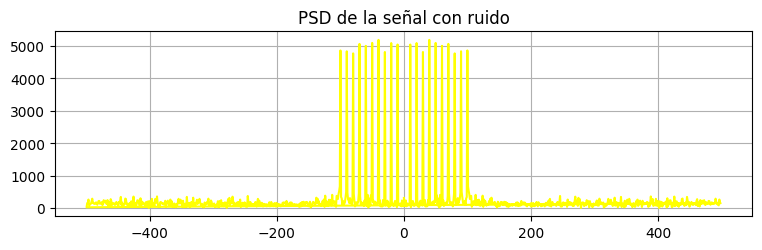

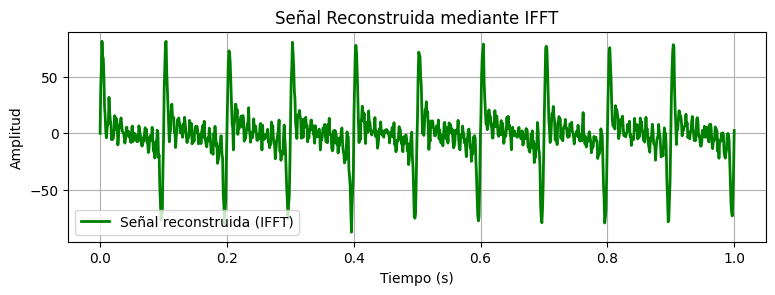

In [4]:
##Plot de la tranformada y la trnasporfada inversa

#grafica del espectro de la señal (fft)
# plt.figure(figsize=(9, 6))
# plt.plot(frecuencia_fft[:len(frecuencia_fft)//2], magnitud_fft[:len(frecuencia_fft)//2], color='red', linewidth=2)
# plt.title('Espectro de Frecuencias (FFT)')
# plt.xlabel('Frecuencia (Hz)')
# plt.ylabel('Magnitud')
# plt.grid()
# plt.show()
#visualizamos el espectro de potencia
plt.figure(figsize =(9,6))
plt.subplot(2,1,1)
plt.title('PSD de la señal con ruido')
plt.plot(frecuencia_fft,np.abs(fft_final),'yellow')
plt.grid()
plt.subplots_adjust(wspace=0.5, hspace=0.5)


#Grafica de la señal reconstruida
plt.figure(figsize=(9, 6))
plt.subplot(2,1,2)
plt.plot(t, np.real(ifft_final), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

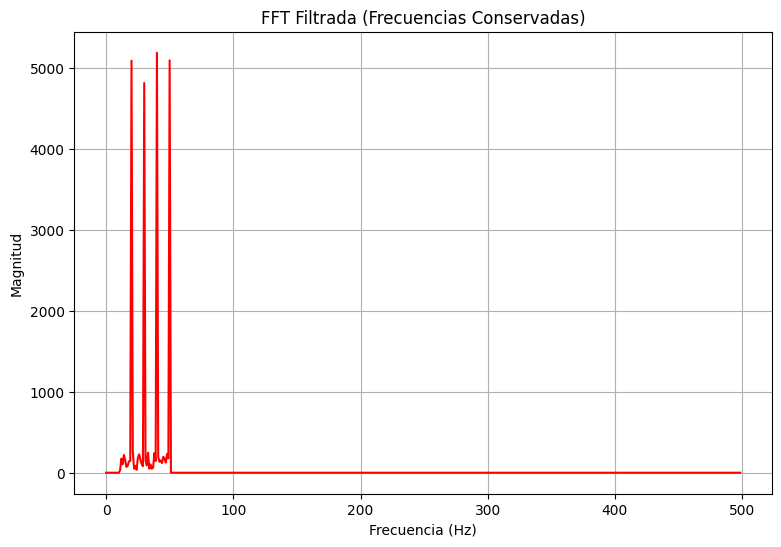

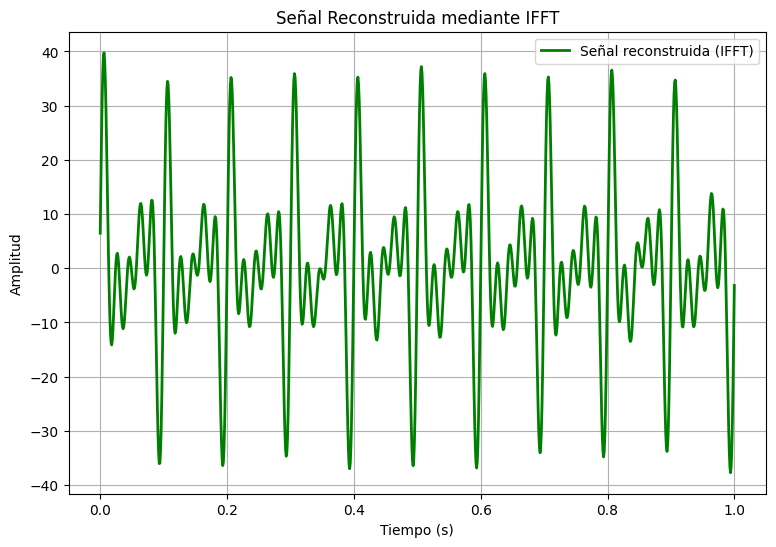

In [5]:
## aplicando el filtro para eliminar componentes

filtro = np.zeros_like(fft_final)
filtro[(frecuencia_fft >= 10) & (frecuencia_fft <= 50)] = 1
filtro[(frecuencia_fft <= -10) & (frecuencia_fft >= -50)] = 1

señal_filtrada = fft_final * filtro


#volviendo a la funcion de el tiempo
señal_filtrada_tiempo = np.fft.ifft(señal_filtrada)


plt.figure(figsize=(9, 6))
plt.plot(frecuencia_fft[:len(frecuencia_fft)//2], np.abs(señal_filtrada[:len(frecuencia_fft)//2]), color='red')
plt.title('FFT Filtrada (Frecuencias Conservadas)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


## Filtrada en el tiempo
plt.figure(figsize=(9, 6))
plt.plot(t, np.real(señal_filtrada_tiempo), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


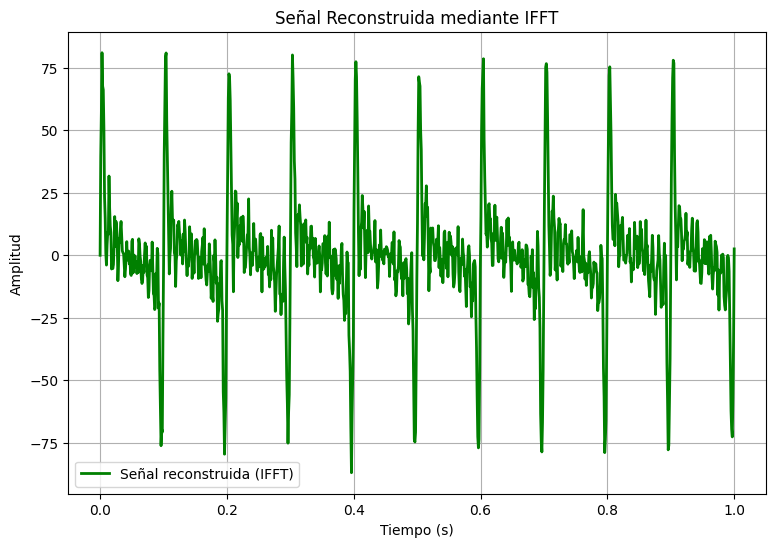

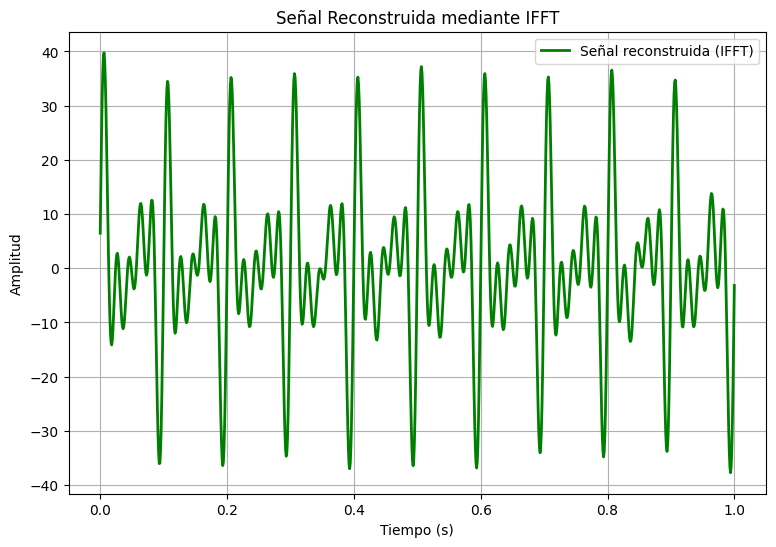

In [6]:
### Comparacion de la señal original con ruido y la señal luego del filtro

plt.figure(figsize=(9, 6))
plt.plot(t, np.real(ifft_final), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


## Filtrada en el tiempo
plt.figure(figsize=(9, 6))
plt.plot(t, np.real(señal_filtrada_tiempo), label='Señal reconstruida (IFFT)', color='green', linewidth=2)
plt.title('Señal Reconstruida mediante IFFT')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()


## Segunda Parte del Taller (Ecualizador)
27/11/2024

Ecualizador de 5 frecuencias, a partir del código del ecualizador de 1 frecuencia copiado de https://github.com/YeisonCardona/procesamiento-senales

In [7]:
!pip install dsp_utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.7 MB/s eta 0:00:00


In [8]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from scipy.fftpack import rfft, rfftfreq

from dsp_utils.filters import frequency as flt
from dsp_utils.signals import SignalGenerator
from dsp_utils.signals import Visualizer

In [9]:
def filter_(signal, f0, f1, sample_rate):
    f = flt.GenericButterBandPass(f0, f1, fs=sample_rate, N=2)
    signal_filtered = f(signal)
    return signal_filtered

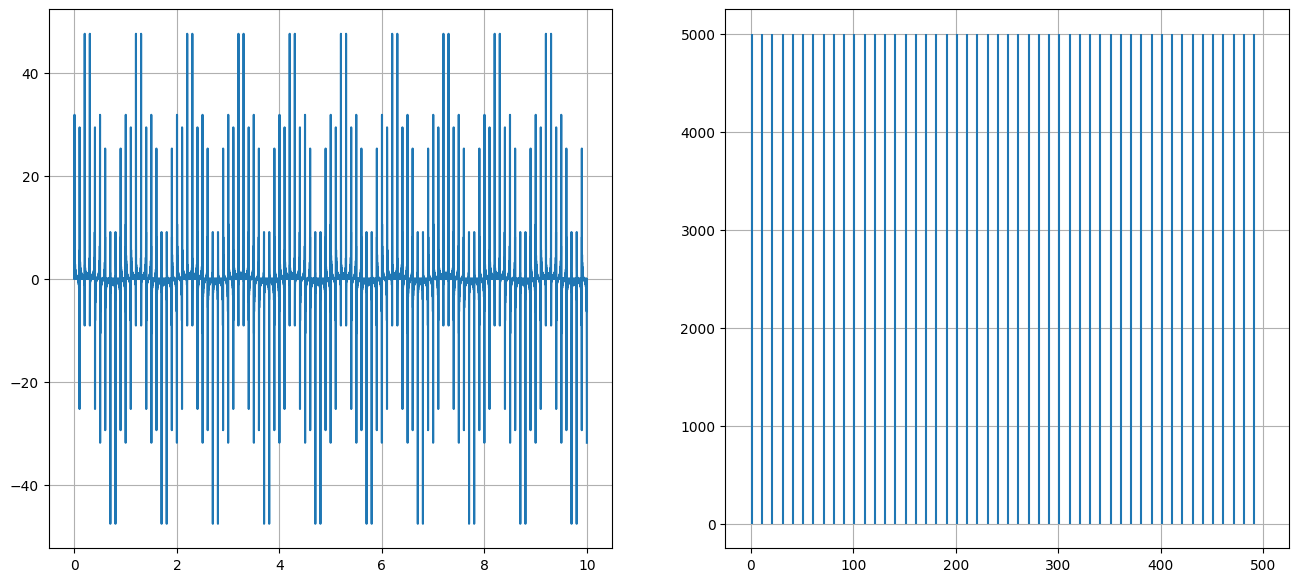

In [10]:
vis = Visualizer(figsize=(16, 7), dpi=100)

f = np.arange(1, 500, 10)

generador = SignalGenerator(frequency=f, amplitude=1, duration=10, sampling_rate=1000)
signal = np.sum(generador.sine_wave, axis=0)

vis.plot_dsp(signal, sample_rate=1000, time=generador.time, ffn='vlines')

In [13]:
@interact(fc=(0, 500, 10), wb=(10, 250, 10), g=(-10, 10, 1))

def equalizer(fc=100, wb=10, g=0):
    f0 = fc-wb
    f1 = fc+wb
    sample_rate = generador.sampling_rate

    if f0<=0:
        f0 = 0.1
    if f1>=sample_rate/2:
        f1 = sample_rate/2 - 0.1

    signal_filtered = filter_(signal, f0, f1, sample_rate)

    signal_equalized = (signal - signal_filtered) + (signal_filtered*np.power(10, (g / 20)))

    vis.plot_dsp(signal_equalized, sample_rate=1000, time=generador.time, ffn='vlines')
    plt.show()


interactive(children=(IntSlider(value=100, description='fc', max=500, step=10), IntSlider(value=10, descriptio…

In [19]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# Interfaz interactiva para ajustar el ecualizador de 5 bandas
@interact(
    fc1=(20, 500, 10), wb1=(10, 100, 10), g1=(-20, 20, 1),
    fc2=(20, 500, 10), wb2=(10, 100, 10), g2=(-20, 20, 1),
    fc3=(20, 500, 10), wb3=(10, 100, 10), g3=(-20, 20, 1),
    fc4=(20, 500, 10), wb4=(10, 100, 10), g4=(-20, 20, 1),
    fc5=(20, 500, 10), wb5=(10, 100, 10), g5=(-20, 20, 1),
)
def equalizer_5_bands(fc1=50, wb1=20, g1=0,
                      fc2=150, wb2=30, g2=0,
                      fc3=250, wb3=40, g3=0,
                      fc4=350, wb4=50, g4=0,
                      fc5=450, wb5=60, g5=0):
    """
    Ecualizador gráfico interactivo de 5 bandas.

    Ajusta una señal de entrada mediante controles de frecuencia central,
    ancho de banda y ganancia para cada banda.

    Parámetros iniciales:
        fcX: Frecuencia central de la banda X (en Hz).
        wbX: Ancho de banda de la banda X (en Hz).
        gX: Ganancia aplicada a la banda X (en dB).
    """

    # Parámetros generales
    sample_rate = generador.sampling_rate
    # Función para aplicar el filtro paso banda
    def apply_bandpass_filter(input_signal, center_freq, wb, g):
        """
        Aplica un filtro de paso banda y ajusta la ganancia.

        Parámetros:
            input_signal: La señal a filtrar.
            center_freq: Frecuencia central del filtro (Hz).
            wb: Ancho de banda del filtro (Hz).
            g: Ganancia aplicada en dB.

        Retorna:
            Señal filtrada con la ganancia ajustada.
        """
        # Límites del filtro
        f0 = max(0.1, center_freq - wb)  # Frecuencia mínima
        f1 = min(sample_rate / 2 - 0.1, center_freq + wb)  # Frecuencia máxima

        # Aplicar el filtro (asume que filter_ está definido)
        filtered_signal = filter_(input_signal, f0, f1, sample_rate)

        # Ajustar la ganancia
        g_factor = np.power(10, g / 20)
        return filtered_signal * g_factor

    # Aplicar el filtro a cada banda
    bands = [
        apply_bandpass_filter(signal, fc1, wb1, g1),
        apply_bandpass_filter(signal, fc2, wb2, g2),
        apply_bandpass_filter(signal, fc3, wb3, g3),
        apply_bandpass_filter(signal, fc4, wb4, g4),
        apply_bandpass_filter(signal, fc5, wb5, g5),
    ]

    # Sumar las bandas filtradas
    equalized_signal = np.sum(bands, axis=0)

    time = generador.time
    # Visualizar la señal original y la ecualizada
    plt.figure(figsize=(12, 6))

    # Señal original
    plt.subplot(2, 1, 1)
    plt.plot(time, signal, label='Señal Original', color='blue')
    plt.title('Señal Original')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.legend()

    # Señal ecualizada
    plt.subplot(2, 1, 2)
    plt.plot(time, equalized_signal, label='Señal Ecualizada', color='red')
    plt.title('Señal Ecualizada')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


interactive(children=(IntSlider(value=50, description='fc1', max=500, min=20, step=10), IntSlider(value=20, de…